In [1]:
import os
import cv2
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

from reader import Data

In [2]:
file_name = "head_train.txt"

In [3]:
with open(file_name) as f:
    lines = f.readlines()

In [4]:
sample = lines[0]
info_ary = sample.split(' ')
path = info_ary[0]

In [5]:
img = misc.imread(path)

In [6]:
path

'20171001/images/1/cc4a3ec4-e0c1-403f-8ab0-1aa79e7a6899/3/20.jpg'

In [7]:
boxes = []
i = 1
while i < len(info_ary):
    boxes.append([int(e) for e in info_ary[i:i+4]])
    i = i + 5

In [8]:
boxes

[[1313, 723, 1464, 884], [1046, 740, 1206, 893], [787, 1200, 992, 1410]]

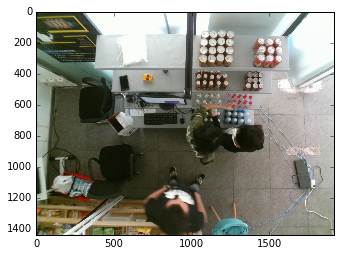

In [9]:
plt.imshow(img)

In [10]:
img_tmp = np.copy(img)
for box in boxes:
    xmin, ymin, xmax, ymax = box
    img_tmp[ymin:ymax, xmin:xmax] = 255

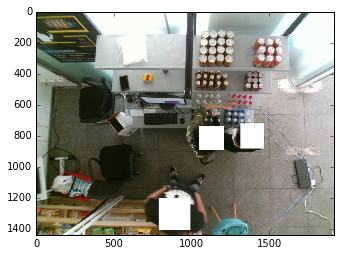

In [11]:
plt.imshow(img_tmp)

In [12]:
ds = Data(['head_train.txt'], shuffle=False, flip=False, affine_trans=False, use_multi_scale=False, period=10)

In [13]:
ds.reset_state()

In [14]:
dp_prod = ds.get_data()

In [ ]:
dp = next(dp_prod)

> /home/user/tensorflow_workspace/YOLOv2/reader.py(116)generate_sample()
-> image = cv2.resize(image, (image_width, image_height))
(Pdb) image_width
384
(Pdb) image_height
288
(Pdb) image.shape
(1440, 1920, 3)
(Pdb) n
> /home/user/tensorflow_workspace/YOLOv2/reader.py(118)generate_sample()
-> tx = np.tile(0.5, (cfg.n_boxes, 1, grid_h, grid_w)).astype(np.float32)
(Pdb) image.shape
(288, 384, 3)


In [16]:
image, tx, ty, tw, th, tprob, spec_mask, truth_box, img_shape = dp

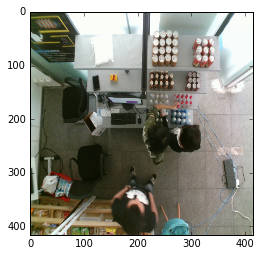

In [17]:
plt.imshow(image)

In [18]:
np.where(spec_mask)

(array([0, 0, 3]), array([ 7,  7, 11]), array([7, 9, 6]))

In [19]:
spec_mask.shape

(5, 13, 13)

In [21]:
tx[3, 0, 11, 6]

0.022656251